In [1]:
#### Interferometry Analysis Software for Ofenrohr-Interferomter at Astropeiler
# Version 1.0

# import packages
import time
import os

# import python scripts
import times
import single_stovepipe
import correlation
import fringe_period
import uv_cov
import visibility_calc
import imaging

In [2]:
# start time to measure duration of programm execution
start_time = time.time()

In [3]:
# define basic parameters: 

# resampling to smooth data/ compensate integration time rate
resampling = 5
# Cantenna-Scan to analyze
scan_number = '322a'
filename_data = './Data/LCORR_'+str(scan_number)+'.csv'
# save results of analysis in this folder
#os.mkdir('./Analysis/LCORR_'+str(scan_number))

In [4]:
# get time vector in fractional hours from Scan
time_h = times.time_h(scan_number)
# resample fractionaal time vector
time_h_res = times.time_h_res(time_h,resampling)
# get sunrise, suntransit, sunset and filter fractional time vector to sun above horizon
time_sun = times.time_sun(scan_number,time_h_res)
# get astronomical twilight times
twil_sun =times.twilight(scan_number,time_h_res)
# define wavelength for observed frequency and bandwidth
wavel = single_stovepipe.wavel(1419e6,2e6,scan_number)

Observation date: 2024/10/28 00:00:00
sunrise at Stockert Observatory will be [UTC]:  2024/10/28 06:17:41
transit at Stockert Observatory will be [UTC]:  2024/10/28 11:16:51
sunset at Stockert Observatory will be [UTC]:  2024/10/28 16:15:16
Twilight morning at Stockert Observatory will be [UTC]:  2024/10/28 04:27:40
Twilight evening at Stockert Observatory will be [UTC]:  2024/10/28 18:05:07
Observed wavelength of central frequency: 0.21127023114869625 m
Observed wavelength of lower end of bandwidth: 0.2114192228490832 m
Observed wavelength of upper end of baseline bandwidth: 0.21112144929577464 m


Results of baseline fit for West antenna:
residuals: 1.4597933937497127
Parameter 1/a: (0.0053862537212290415, 3.5483360405400814e-05)
Parameter 2/b: (-0.18191817311094835, 0.0013634516910443531)
Parameter 3/c: (0.8312479166285429, 0.015234394247944705)
Parameter 4/d: (571.6177257443625, 0.036330241392933164)
Results of baseline fit for East antenna:
residuals: 0.8622916665568058
Parameter 1/a: (0.003222426975223878, 2.7990476007996106e-05)
Parameter 2/b: (-0.128456323452236, 0.00112650663586039)
Parameter 3/c: (1.1869925362582807, 0.013089782145553478)
Parameter 4/d: (370.74752738314, 0.033419008865085906)
Results of baseline fit for Middle1 antenna:
residuals: 1.0182559754838527
Parameter 1/a: (-0.00012588856444821625, 2.691364562874247e-05)
Parameter 2/b: (0.01257922944985461, 0.0010278383231932292)
Parameter 3/c: (0.12175429463053837, 0.011351898089635484)
Parameter 4/d: (348.9895600102313, 0.026526725614939097)
Results of baseline fit for Middle2 antenna:
residuals: 1.186252858484

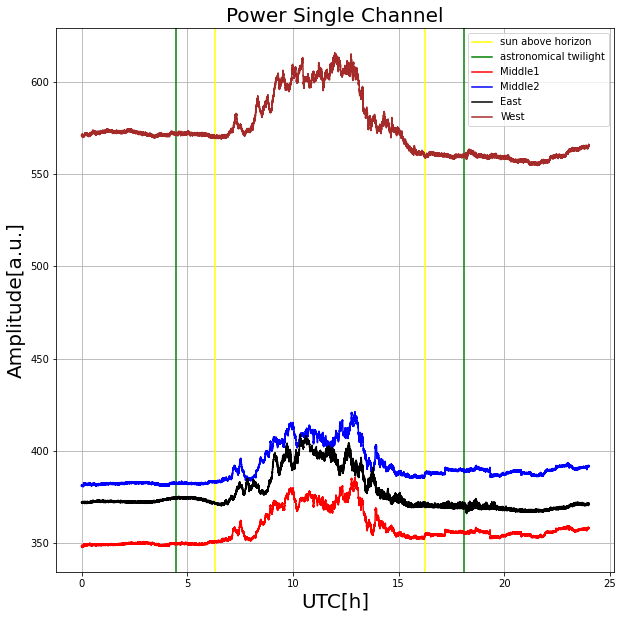

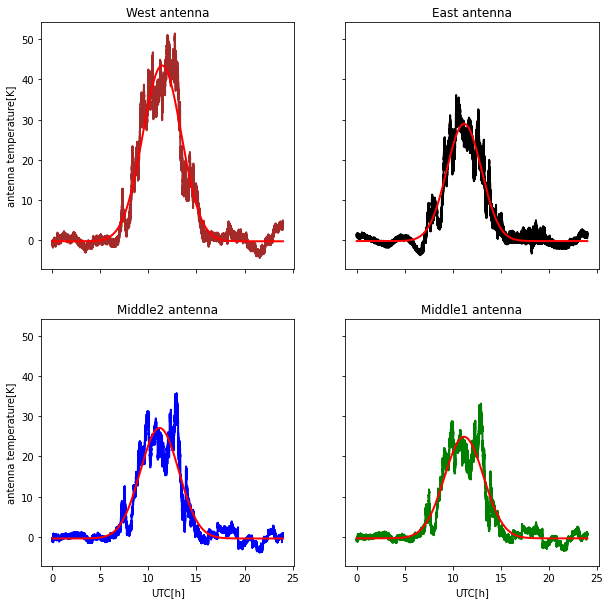

In [5]:
# define continuum signal of each cantenna to check for solar flares/thunderstorms/RFI (layer of water/snow on lid complicates signals)
single_antenna =  single_stovepipe.single_antenna(scan_number,resampling,time_h_res, time_sun[1],time_sun[3],twil_sun[1],twil_sun[2])
# Baseline fit (3rd order polynomial) and RMS of baseline
RMS_analysis = single_stovepipe.RMS_anal(single_antenna, time_h_res, time_sun,scan_number)
# Gaussian fit to sun transit of each Cantenna to deduce Opening Angle (later used for PSF)
HPBW =single_stovepipe.HPBW(RMS_analysis, time_h_res,scan_number)

Results of baseline fit for WM real correlation:
residuals: 0.05379891165661379
Parameter 1/a: (-0.000540962422780654, 6.122203972221053e-06)
Parameter 2/b: (0.014839457735061814, 0.00023382530471679732)
Parameter 3/c: (-0.08608219827683351, 0.00256510654637857)
Parameter 4/d: (1.045613457329119, 0.006002387358075507)
Results of baseline fit for WM imag correlation:
residuals: 0.038400936995663645
Parameter 1/a: (0.00012538291689444673, 5.160904213555156e-06)
Parameter 2/b: (-0.0007126329829824607, 0.00019770773120017838)
Parameter 3/c: (-0.107050860395939, 0.00217353969039023)
Parameter 4/d: (1.853250431006297, 0.005088864006013275)
RMS of MW real correlation Measurement: 0.23346983653334105
RMS of MW imag correlation Measurement: 0.1963917214838727
Results of baseline fit for EM real correlation:
residuals: 0.02611572346293398
Parameter 1/a: (0.00017207306437009418, 4.247668927616167e-06)
Parameter 2/b: (-0.0031291920040410915, 0.00016247917798288555)
Parameter 3/c: (-0.0184413570510

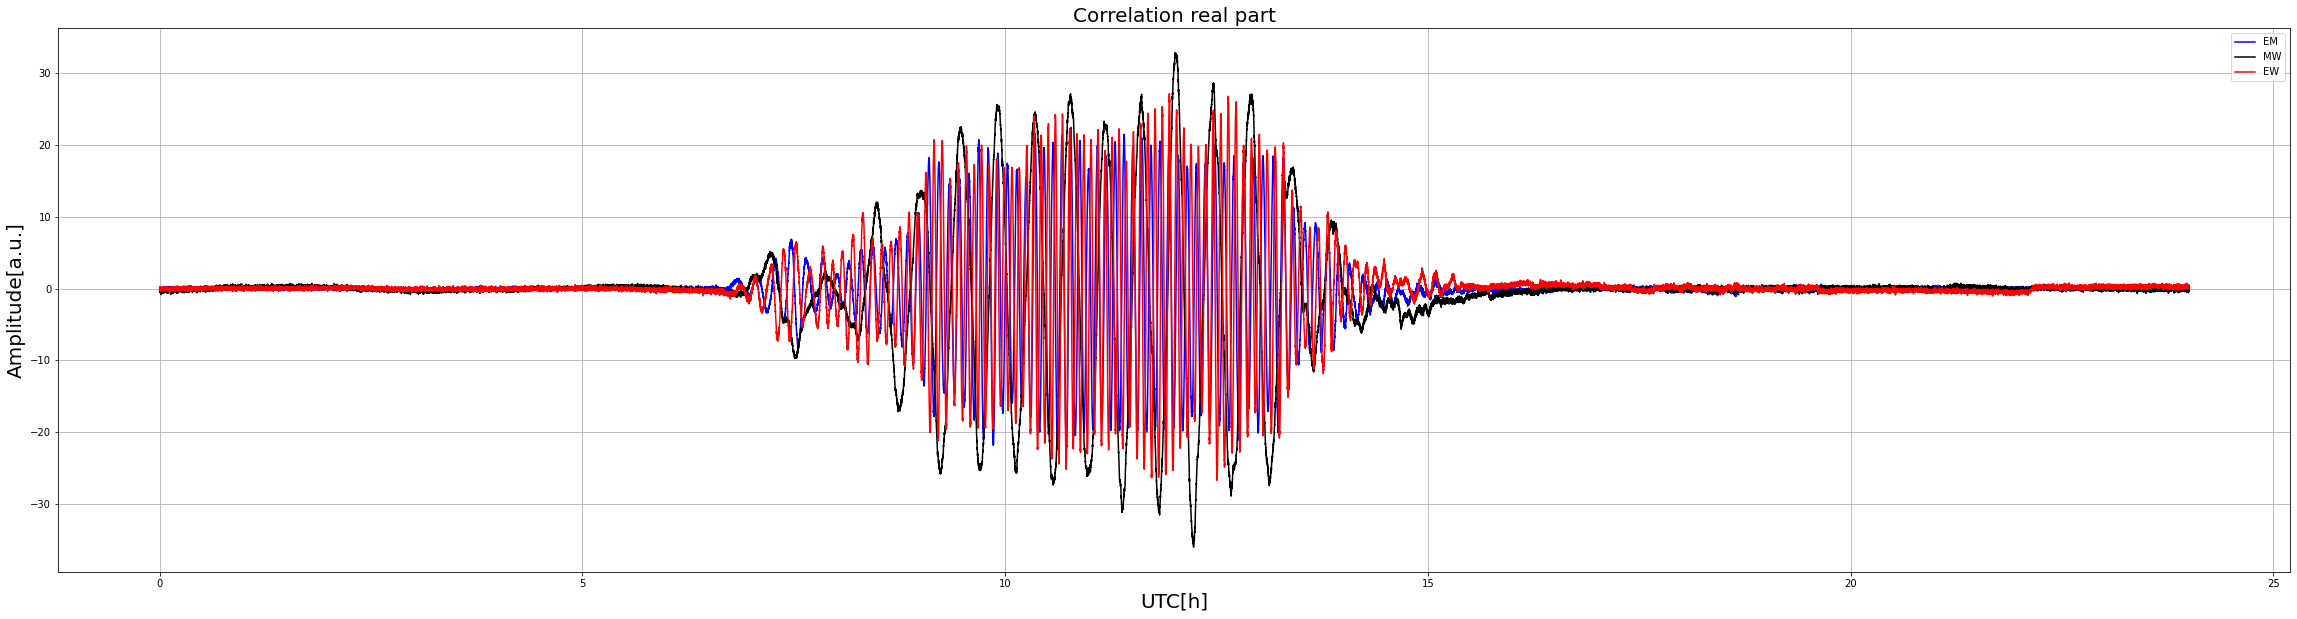

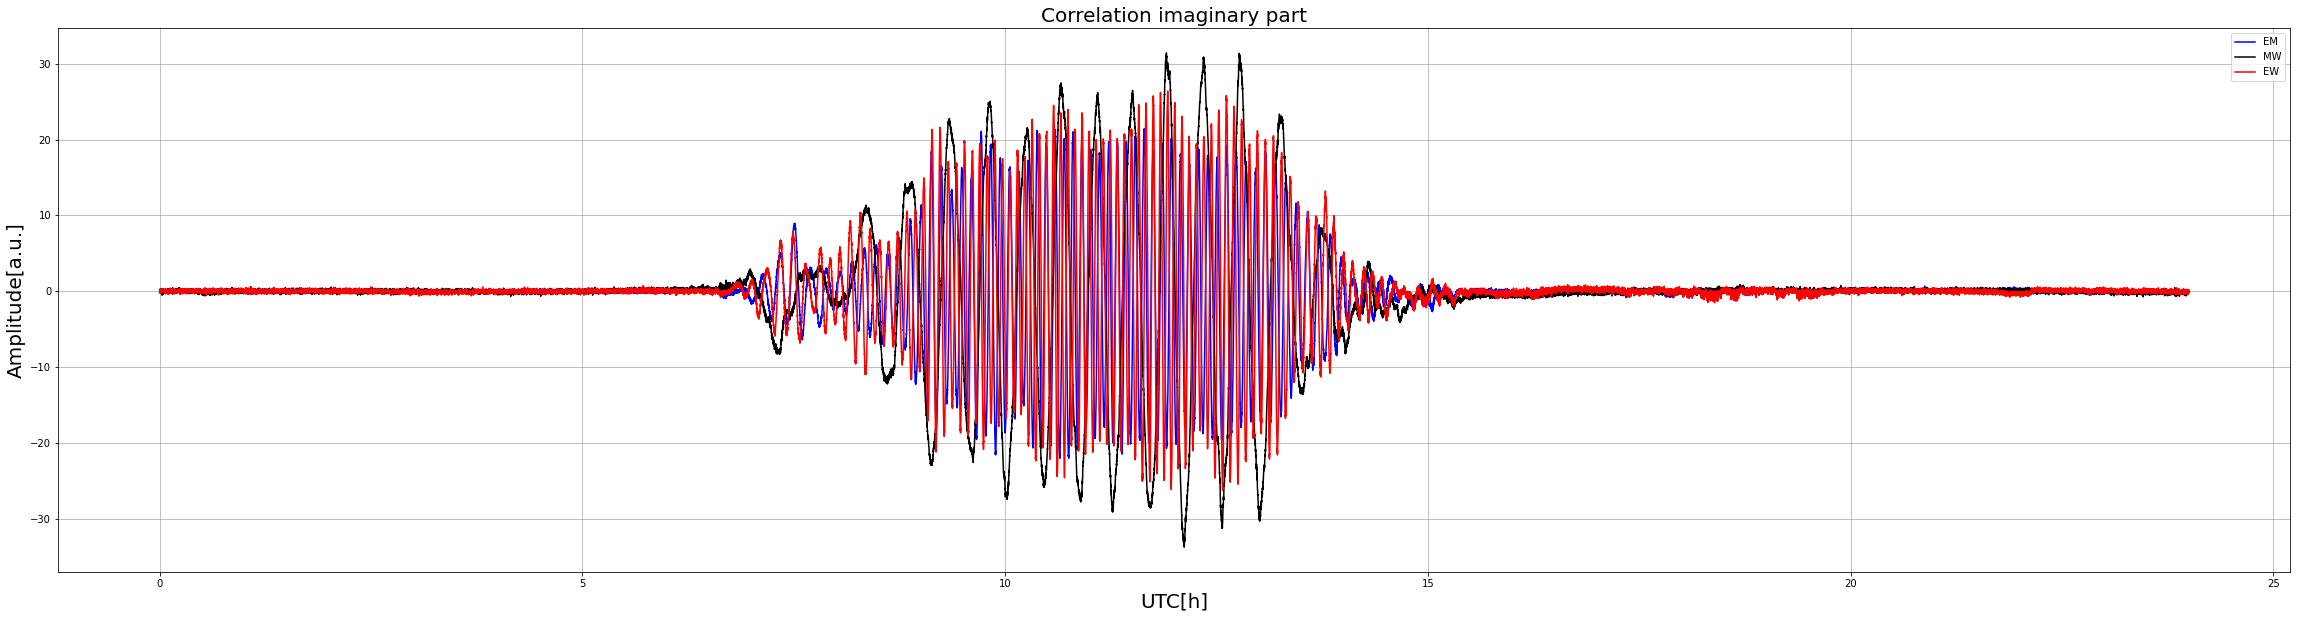

In [6]:
# define and plot real and imaginary parts of correlation of each baseline
correlation_mw =  correlation.correlation_mw(scan_number,time_h_res, time_sun,resampling)
correlation_em =  correlation.correlation_em(scan_number,time_h_res, time_sun,resampling)
correlation_ew =  correlation.correlation_ew(scan_number,time_h_res, time_sun,resampling)
plot_correlation = correlation.plot_correlation(correlation_em,correlation_mw,correlation_ew,scan_number,time_h_res)

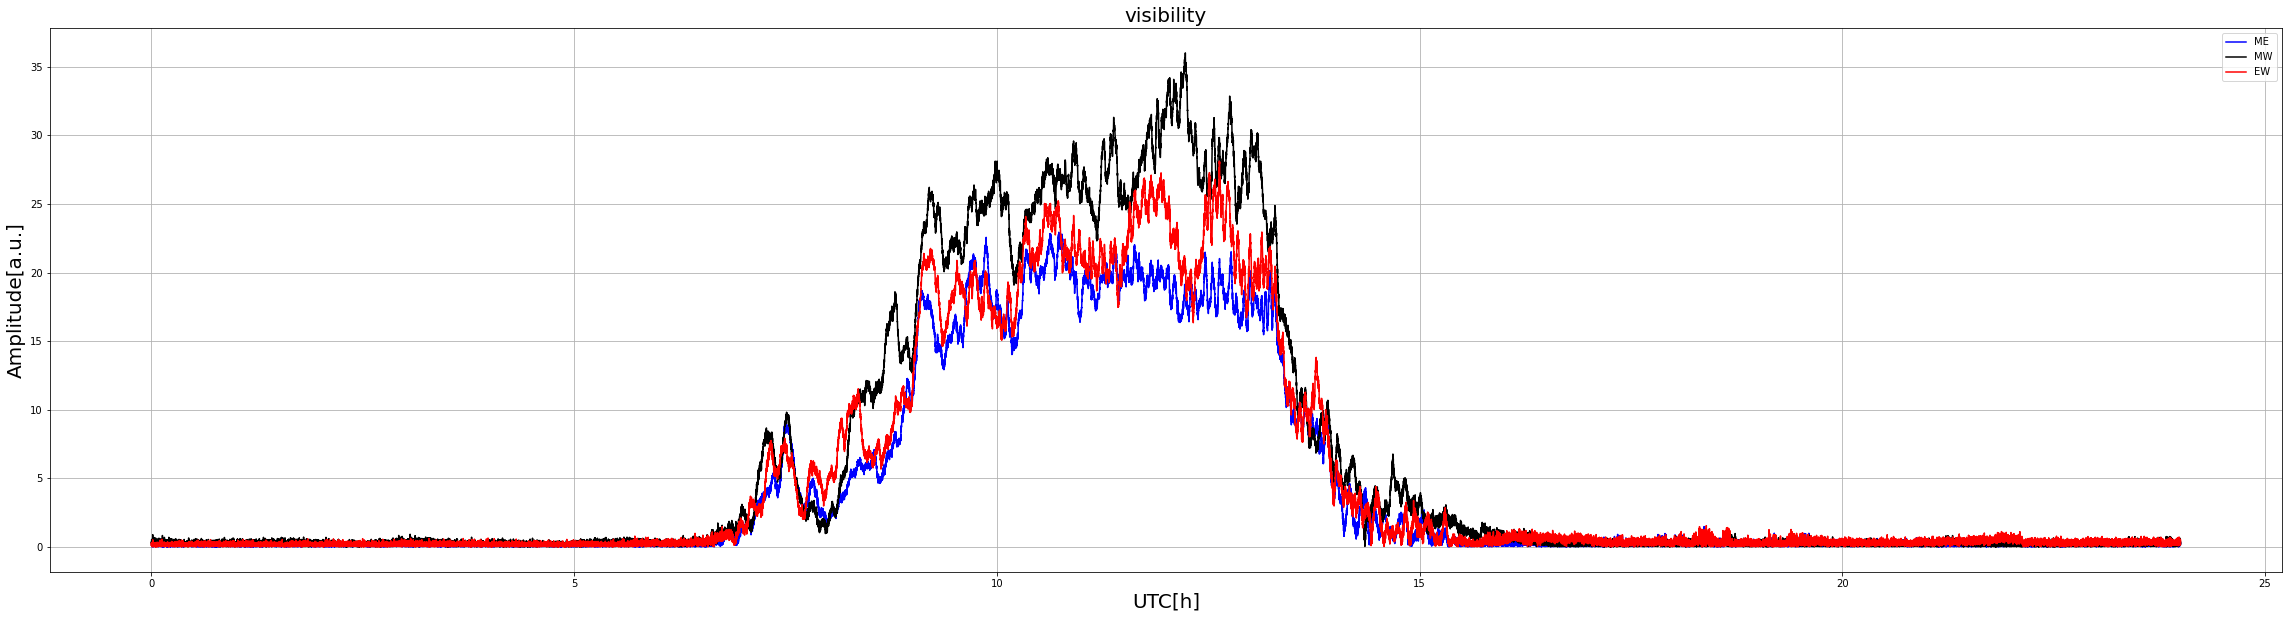

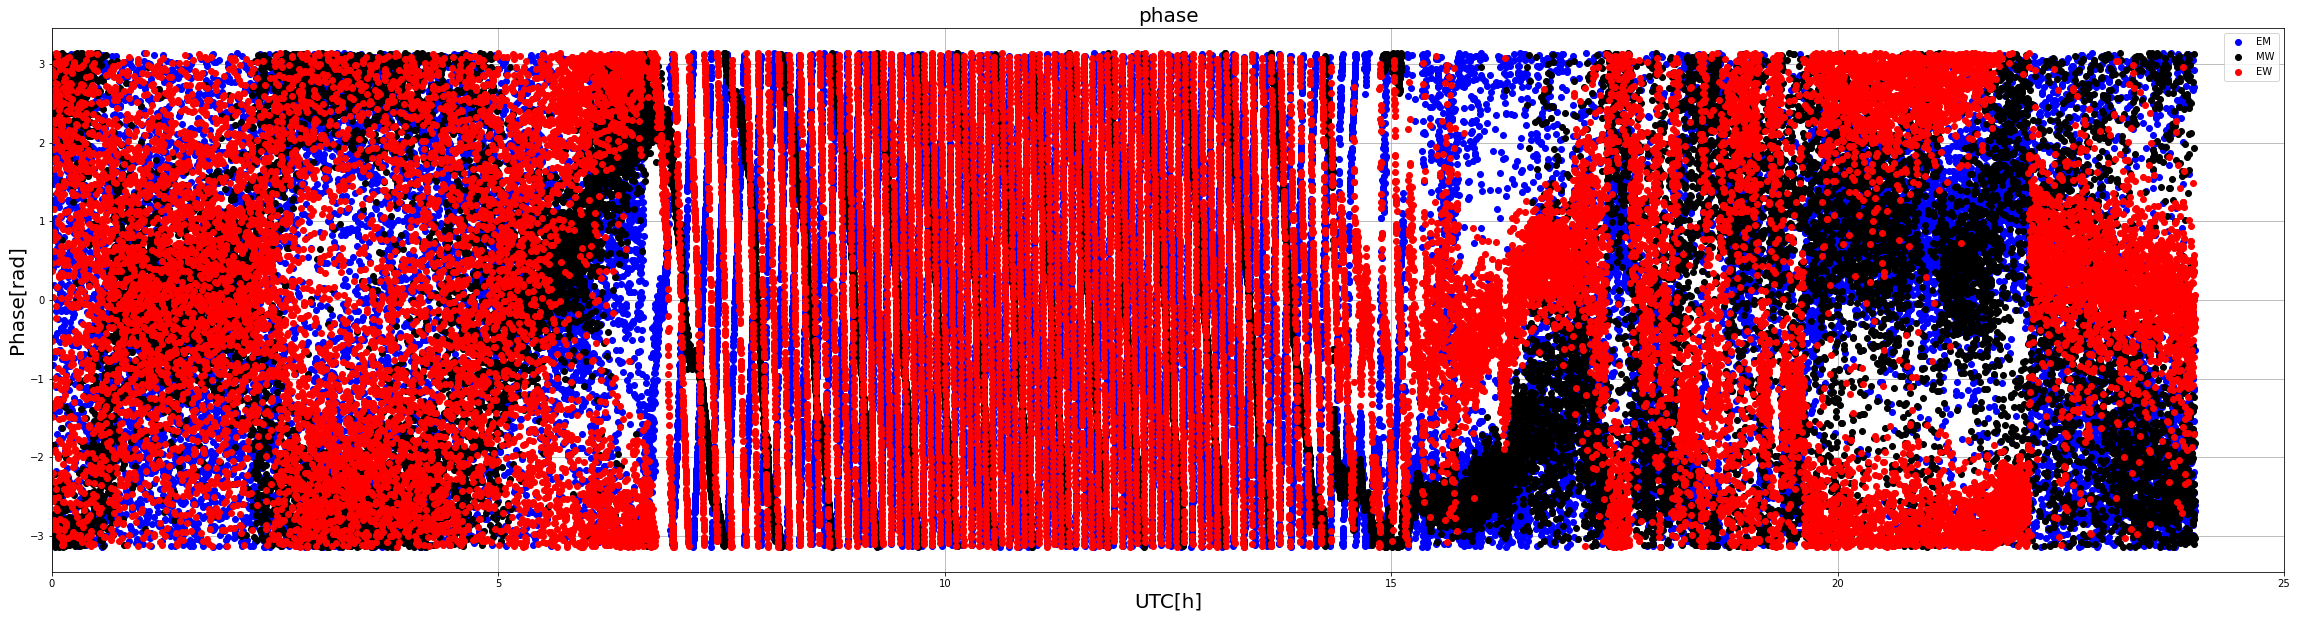

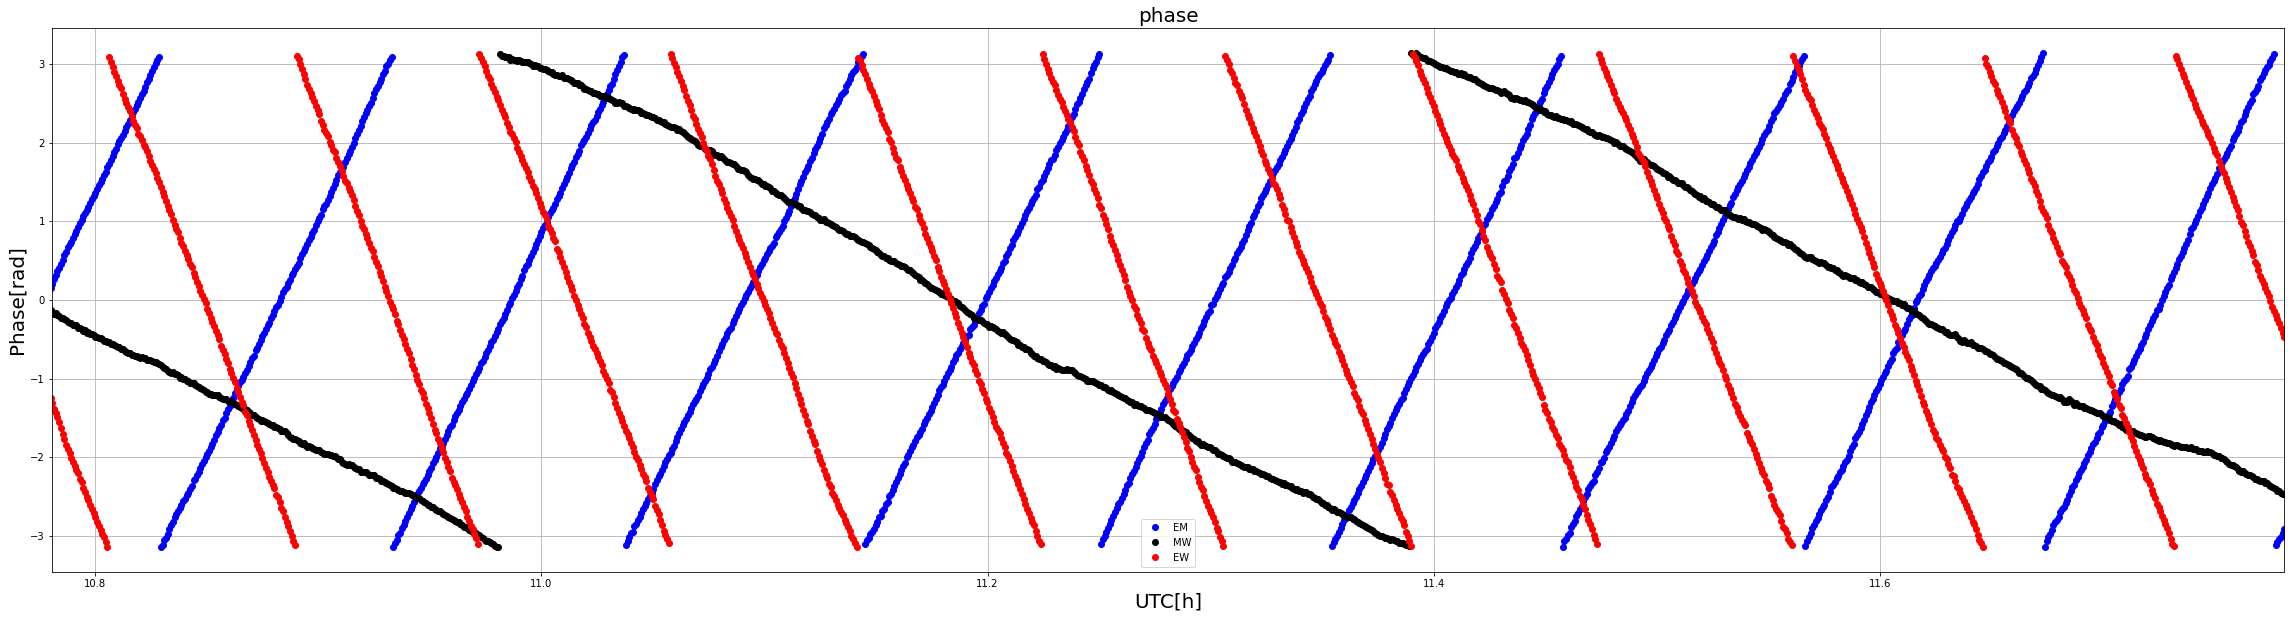

In [7]:
# calculate and plot visibility amplitude and phase 
visibility_em = visibility_calc.visibility_em(correlation_em)
visibility_mw = visibility_calc.visibility_mw(correlation_mw)
visibility_ew = visibility_calc.visibility_ew(correlation_ew)
plot_visibility = visibility_calc.plot_visibility(visibility_em,visibility_mw,visibility_ew,time_h_res,time_sun[2],scan_number)

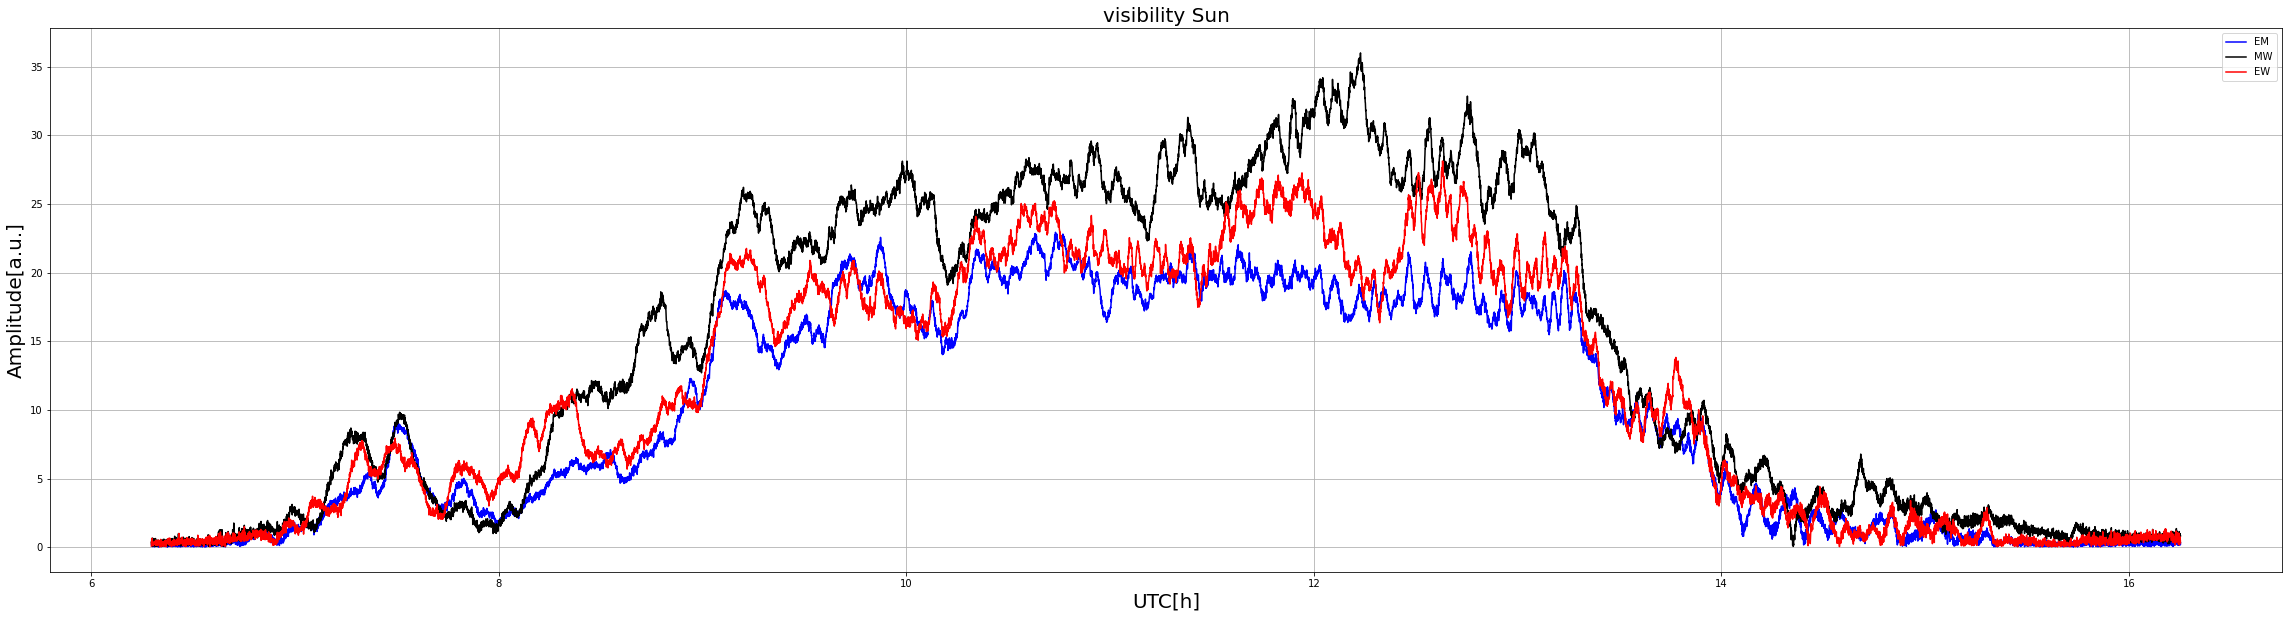

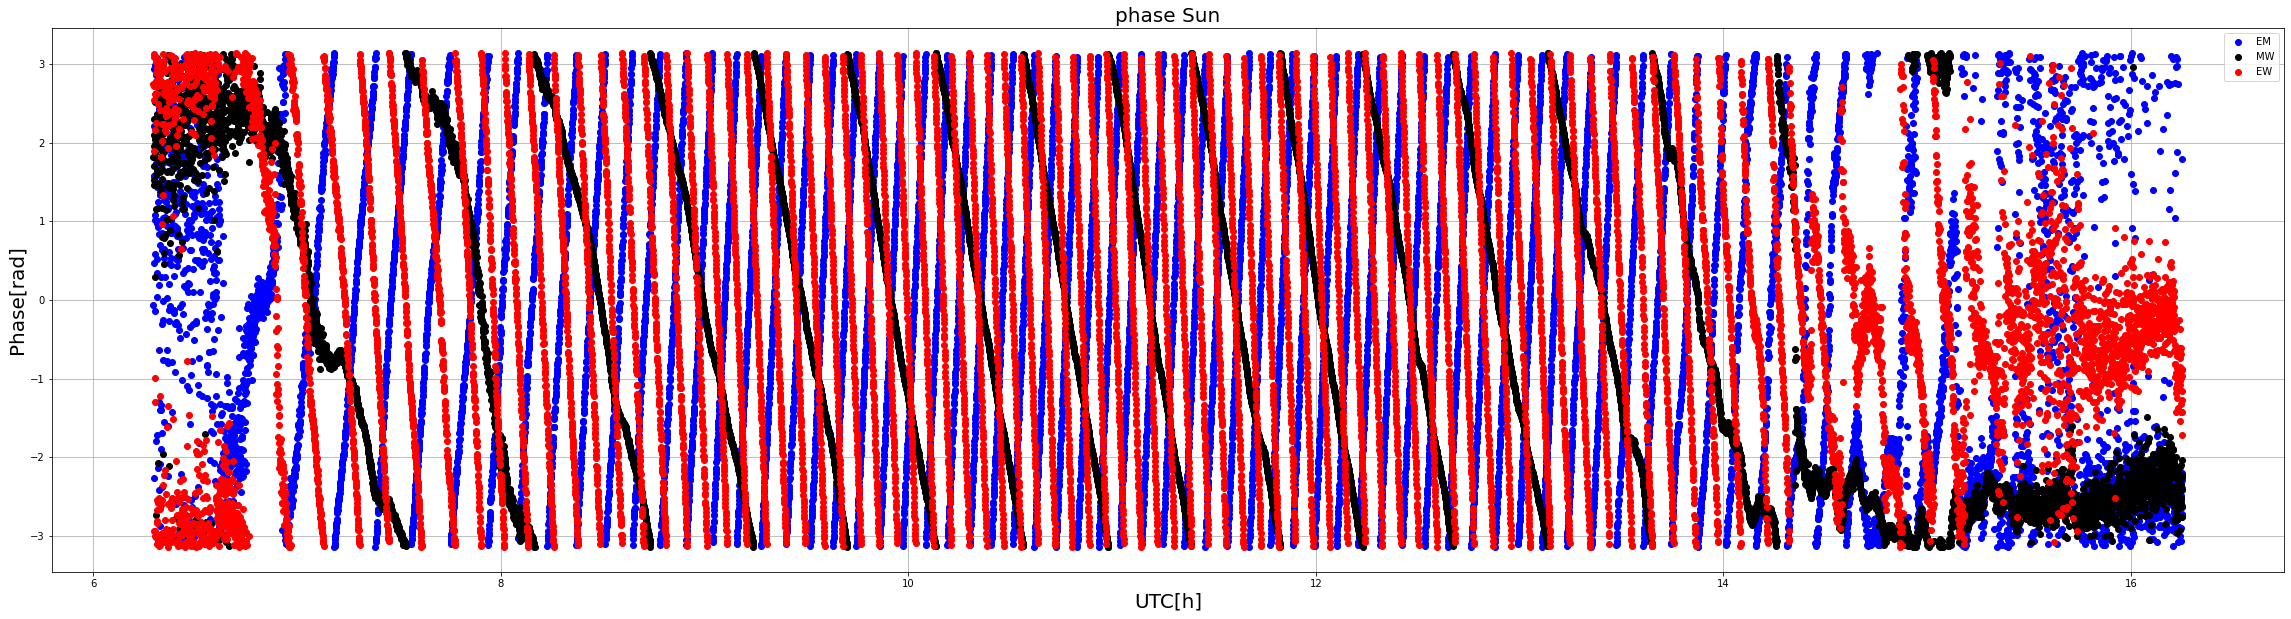

In [8]:
# limit and plot visiblity amplitude and phase for sun above horizon
vis_sun_mw = visibility_calc.vis_sun_mw(visibility_mw, time_h_res, time_sun[1],time_sun[3])
vis_sun_em = visibility_calc.vis_sun_em(visibility_em, time_h_res, time_sun[1],time_sun[3])
vis_sun_ew = visibility_calc.vis_sun_ew(visibility_ew, time_h_res, time_sun[1],time_sun[3])
plot_vis_sun = visibility_calc.plot_vis_sun(vis_sun_em,vis_sun_mw,vis_sun_ew,time_sun[0],scan_number)

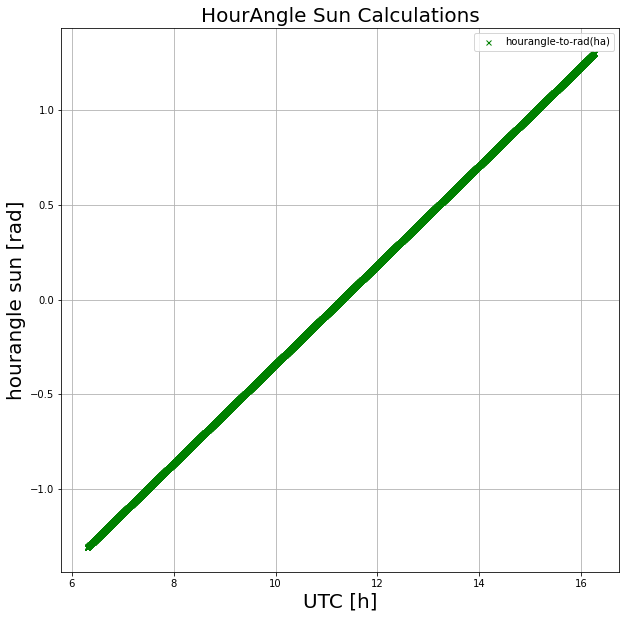

In [9]:
# calculate hour angle and declination of sun for observation day
sun_pos = uv_cov.hour_angle(time_sun[0],scan_number)


Results of EM baseline:
maximum baseline [m]: 7.9
Hour Angle of intersection of baseline with northern hemisphere (S=0°, W=90°, N=180°, E=270°)[deg]: 0.0
declination of intersection of baseline with northern hemisphere[deg]: 0.0
Results of MW baseline:
maximum baseline [m]: 2.0
Hour Angle of intersection of baseline with northern hemisphere (S=0°, W=90°, N=180°, E=270°)[deg]: 0.0
declination of intersection of baseline with northern hemisphere[deg]: 0.0
Results of EW baseline:
maximum baseline [m]: 9.9
Hour Angle of intersection of baseline with northern hemisphere (S=0°, W=90°, N=180°, E=270°)[deg]: 0.0
declination of intersection of baseline with northern hemisphere[deg]: 0.0
Results of EM baseline:
min scale from uv coverage: 1.5322648862597477 deg
time of min scale: 11.280984506888888
max scale from uv coverage: 4.45920071007122 deg
time of max scale: 16.253860020555557
Results of MW baseline:
min scale from uv coverage: 6.052446300726003 deg
time of min scale: 11.280984506888888
m

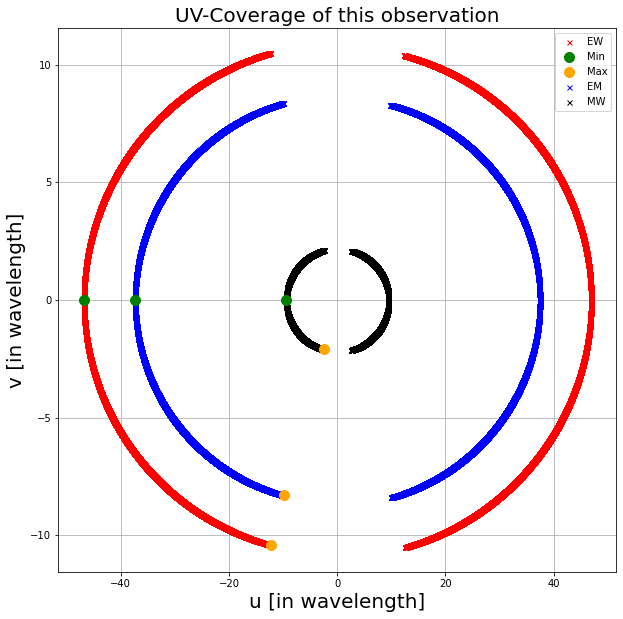

In [10]:
# According to baseline vector, calculate baseline length and hour angle/declination offsets
# B_x is in EW direction (m)
# B_y is in NS direction (m)
# B_z is Height difference (m)
D_em = uv_cov.baseline_length('EM',scan_number,B_x=7.9,B_y=0,B_z=0)
D_mw = uv_cov.baseline_length('MW',scan_number,B_x=2,B_y=0,B_z=0)
D_ew = uv_cov.baseline_length('EW',scan_number,B_x=9.9,B_y=0.0,B_z=0.0)
# calculate and plot u,v and w coordinates in units of wavelength, identify min and max scale
uvw_em = uv_cov.uvw(time_sun[0],scan_number,'EM',wavel,sun_pos[0],sun_pos[1],alpha=D_em[1], d=D_em[2],D=D_em[0])
uvw_mw = uv_cov.uvw(time_sun[0],scan_number,'MW',wavel,sun_pos[0],sun_pos[1],alpha=D_mw[1], d=D_mw[2],D=D_mw[0])
uvw_ew = uv_cov.uvw(time_sun[0],scan_number,'EW',wavel,sun_pos[0],sun_pos[1],alpha=D_ew[1], d=D_ew[2],D=D_ew[0])
plot_uvw = uv_cov.plot_uvw(uvw_em,uvw_mw,uvw_ew,scan_number)

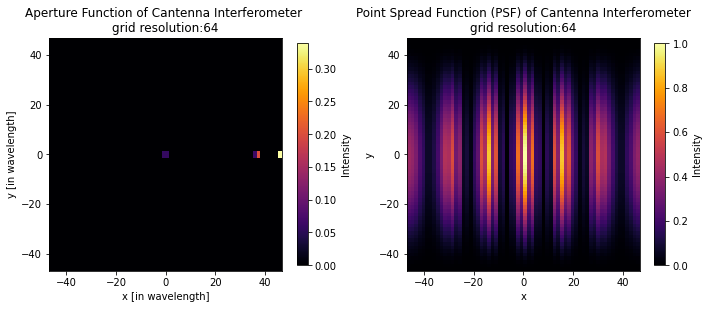

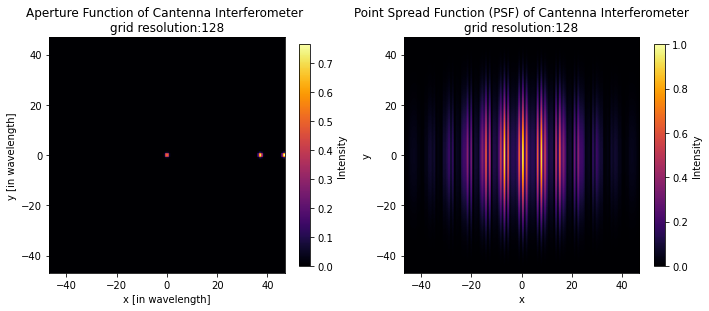

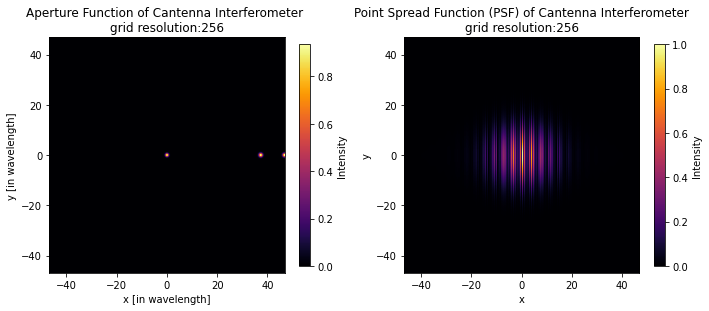

In [11]:
# one uvw and visibility list
uvw_vis = imaging.one_uv_vis_list(uvw_em,uvw_mw,uvw_ew,vis_sun_mw,vis_sun_em,vis_sun_ew)

import numpy as np
baselines_x = np.array([0, 7.9, 9.9])  # Baseline x component (m)
baselines_y = np.array([0,0,0]) # Baseline y component (m)

# PSF calculations (aperture function and PSF) at local noon time for Gaussian sampling function for different resolutions (grid sizes)
PSF0 = imaging.PSF(scan_number,wavel[0], baselines_x, baselines_y, HPBW,grid_size=64)
PSF1 = imaging.PSF(scan_number,wavel[0], baselines_x, baselines_y, HPBW,grid_size=128)
PSF2 = imaging.PSF(scan_number,wavel[0], baselines_x, baselines_y, HPBW,grid_size=256)




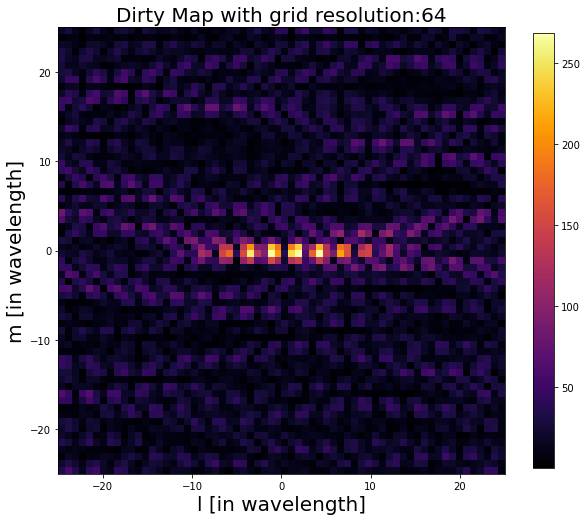

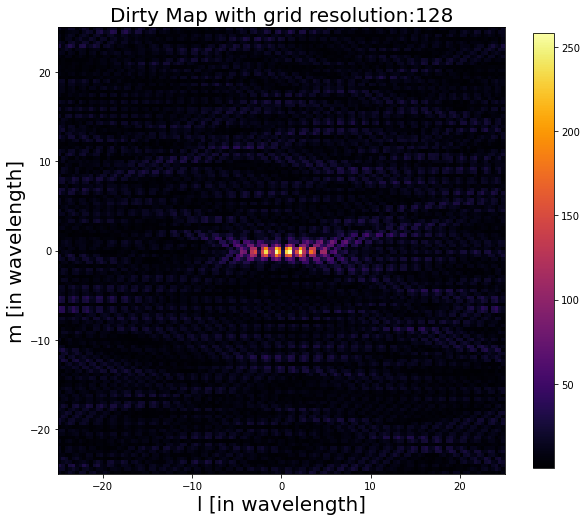

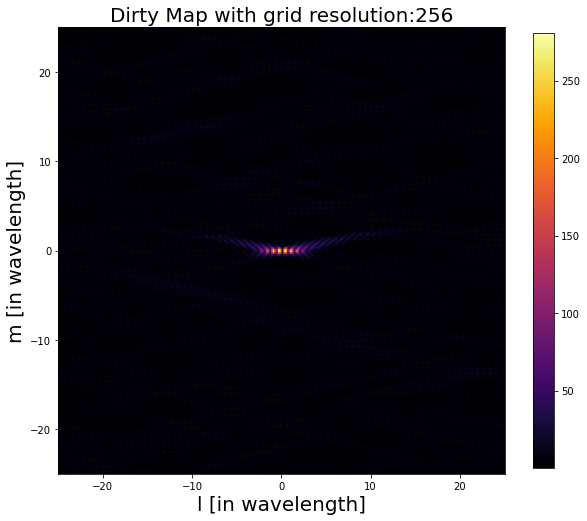

In [12]:
# dirty map calculations for different resolutions (grid sizes)
dirty_map0 = imaging.dirty_map(scan_number,uvw_vis[3], uvw_vis[0],uvw_vis[1],grid_size=64)
dirty_map1 = imaging.dirty_map(scan_number,uvw_vis[3], uvw_vis[0],uvw_vis[1],grid_size=128)
dirty_map2 = imaging.dirty_map(scan_number,uvw_vis[3], uvw_vis[0],uvw_vis[1],grid_size=256)

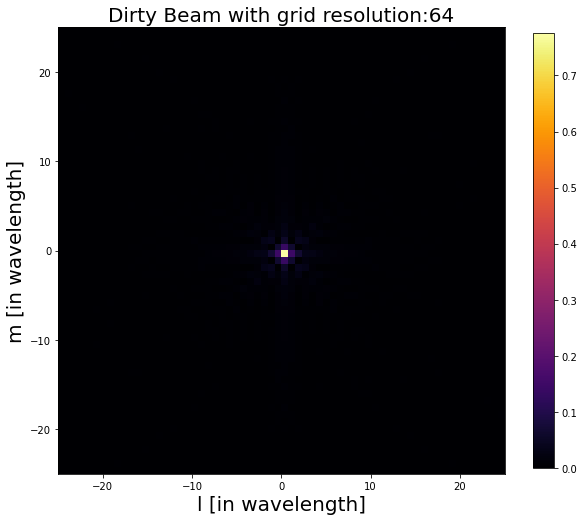

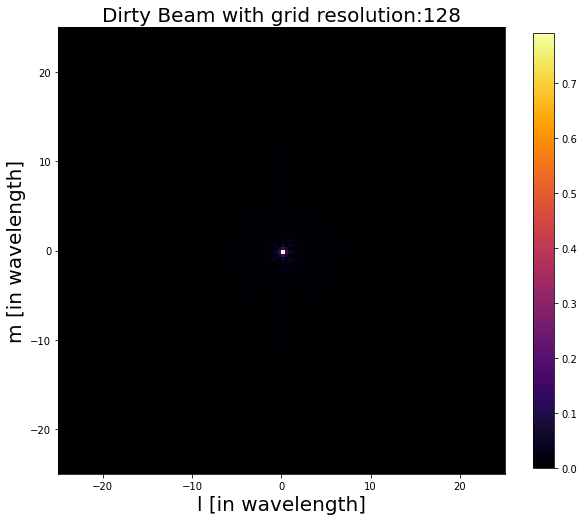

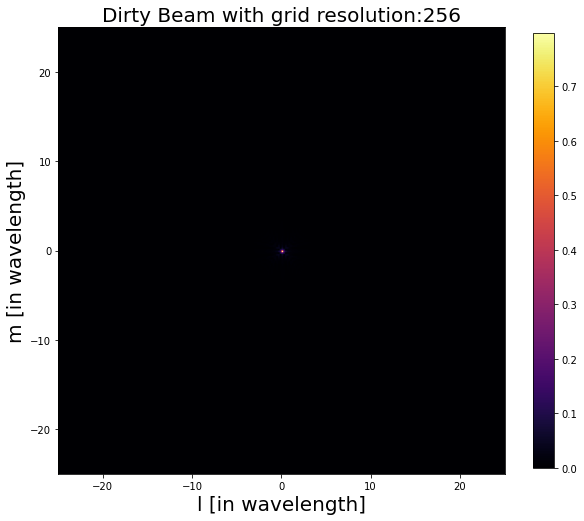

In [13]:
# dirty beam calculations for different resolutions (grid sizes)
dirty_beam0 = imaging.dirty_beam(scan_number, uvw_vis[0],uvw_vis[1],grid_size=64)
dirty_beam1 = imaging.dirty_beam(scan_number, uvw_vis[0],uvw_vis[1],grid_size=128)
dirty_beam2 = imaging.dirty_beam(scan_number, uvw_vis[0],uvw_vis[1],grid_size=256)

Iteration: 25
Peak Value: 79.35663023077154


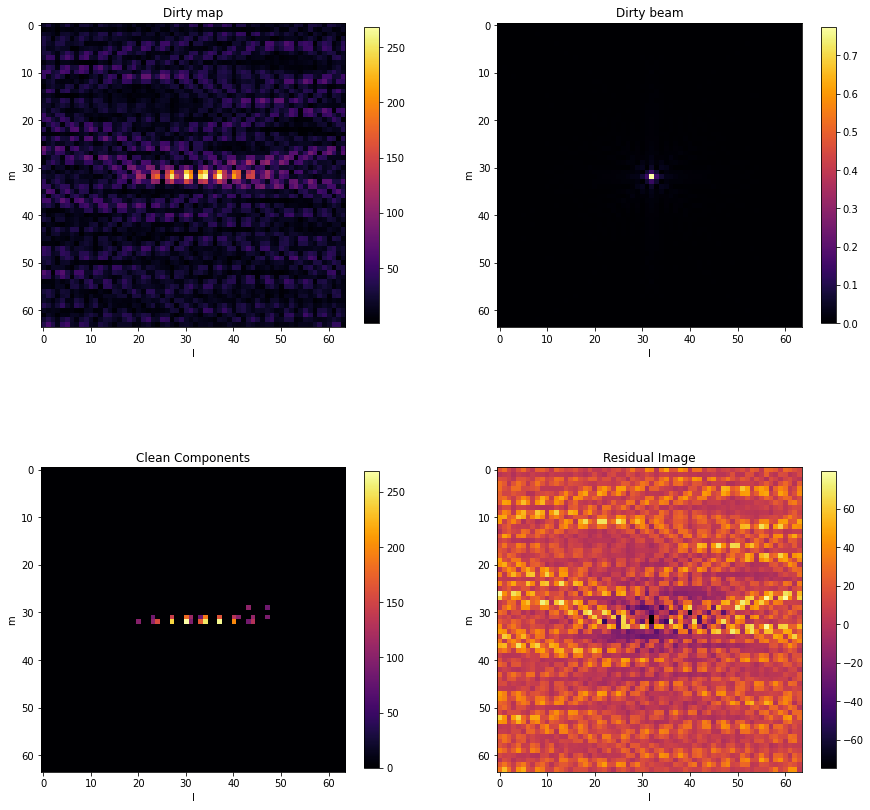

In [14]:
# Parameters
threshold = 80 # Threshold for CLEAN
max_iter = 500 # Maximum iterations
gain=1.0
# Perform CLEAN
clean_image,residual = imaging.clean(np.abs(dirty_map0), np.abs(dirty_beam0), threshold, max_iter,gain)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.title("Dirty map")
plt.imshow((np.abs(dirty_map0)),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(shrink=0.8)
plt.subplot(222)
plt.title("Dirty beam")
plt.imshow((np.abs(dirty_beam0)),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(shrink=0.8)
plt.subplot(223)
plt.title("Clean Components")
plt.imshow((((clean_image))),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(shrink=0.8)
plt.subplot(224)
plt.title("Residual Image")
plt.imshow((((residual))),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(shrink=0.8)
plt.savefig('./Analysis/LCORR_'+str(scan_number)+'/clean_process.png',dpi=200,bbox_inches='tight')

Results of fringe period fit EM baseline:
residuals: 7.851879577005217
Parameter 1/a: (21.831049320530102, 1.0342945331381423)
Parameter 2/b: (0.5584027832730195, 0.0027715401061121775)
Parameter 3/c: (2.5268976844304403, 0.13236406103259643)
Results of fringe period fit MW baseline:
residuals: 1542.5458380343478
Parameter 1/a: (105.08717548396989, 59.83902664501629)
Parameter 2/b: (0.9815043657808566, 0.05806155431457756)
Parameter 3/c: (4.486495993597157, 2.4222901530530345)
Results of fringe period fit EW baseline:
residuals: 49.22148208967568
Parameter 1/a: (12.52525766506384, 1.4614930154989654)
Parameter 2/b: (0.5752307708027766, 0.0066208209426613035)
Parameter 3/c: (1.7097264718300522, 0.1948114156037233)


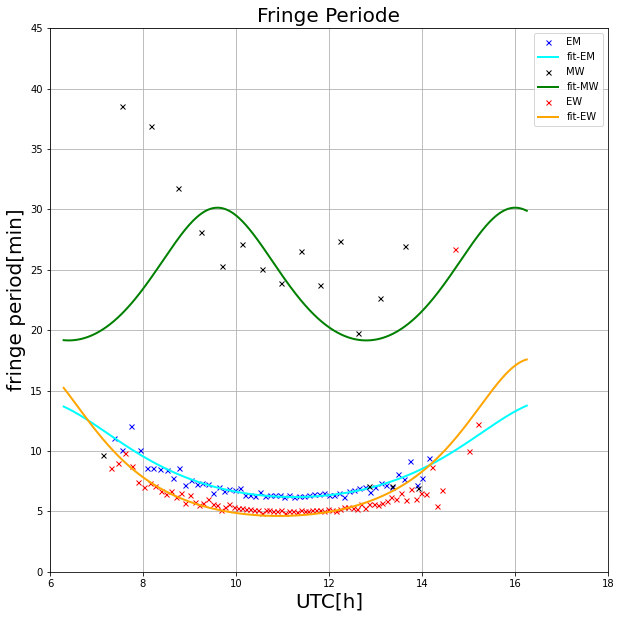

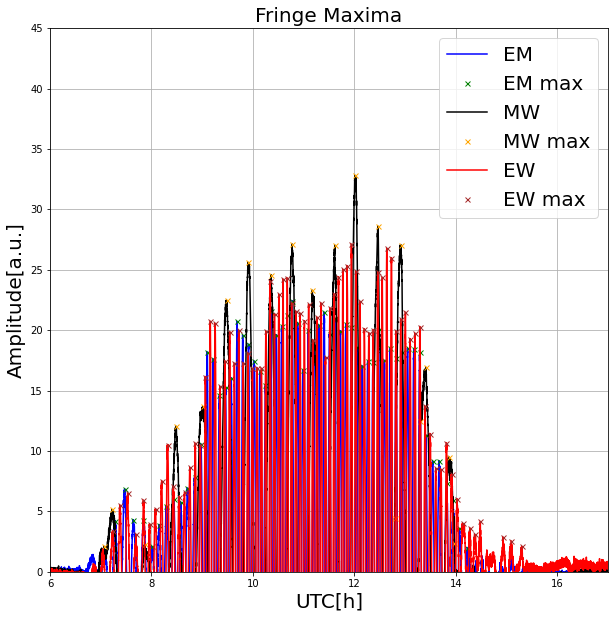

In [15]:
# from real part of correlation get fringe period --> indicator of projected baseline
# depending on baseline length, Bandwidth/Integration time: distance parameter in find_peaks must be changed
fringe_period_fit = fringe_period.fringe_period(correlation_em,correlation_mw,correlation_ew,scan_number,time_h_res,time_sun[0])

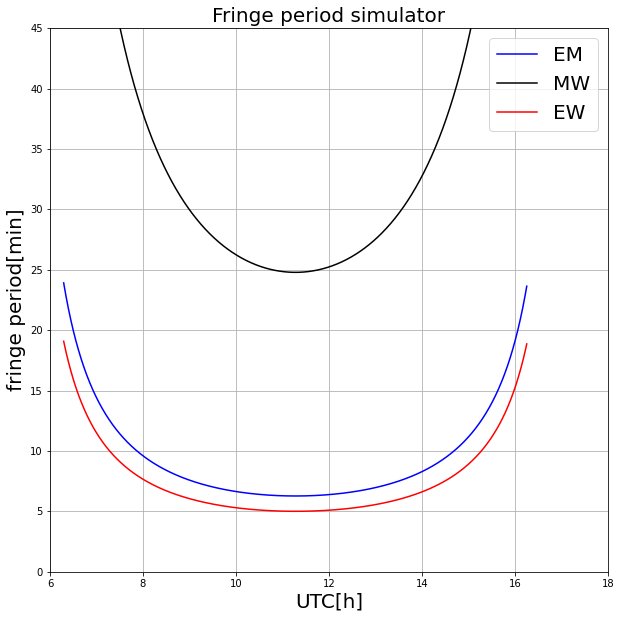

In [16]:
# fringe period simulator according tobaseline (u-coord) and declination of sun for each baseline

fringe_em = fringe_period.fringe_period_simulator(uvw_em[3], sun_pos[1])
fringe_ew = fringe_period.fringe_period_simulator(uvw_ew[3], sun_pos[1])
fringe_mw = fringe_period.fringe_period_simulator(uvw_mw[3], sun_pos[1])
#print(uvw_em[3])#,fringe_em)
plot_fringe_sim = fringe_period.plot_sim(fringe_em,fringe_ew,fringe_mw,time_sun[0], scan_number)

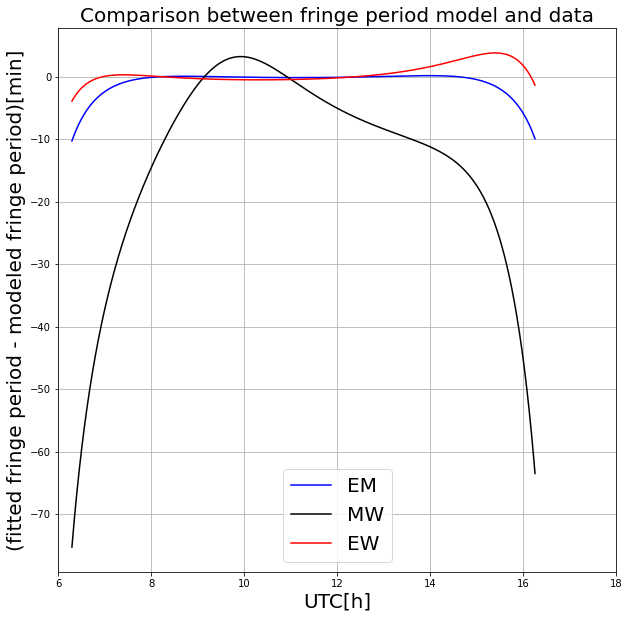

In [17]:
# compared the fitted and modeled results for the fringe period of each baseline
comp_fringe_period =  fringe_period.diff_fit_model(fringe_period_fit, fringe_em, fringe_ew, fringe_mw,time_sun[0], scan_number)

In [18]:
# define end time
end_time = time.time()
# define elapsed time
elapsed_time = end_time - start_time
# Executon time of this program
print(f'Execution time: {elapsed_time:.2f} seconds')

Execution time: 103.36 seconds
